In [13]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [158]:
# train data
data = pd.read_csv('train.csv')

In [159]:
# file to be submittedfrom xgboost import XGBClassifier
sub = pd.read_csv('test.csv')

In [160]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [161]:
sub.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [162]:
# Extract the titles from the Title column
data['Title'] = data['Name'].apply(lambda x : x.split(", ")[1].split(".")[0])

In [163]:
sub['Title'] = sub['Name'].apply(lambda x : x.split(", ")[1].split(".")[0])

In [164]:
# Make the male and female  0 and 1
data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [165]:
sub['Sex'] = sub['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [166]:
data['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

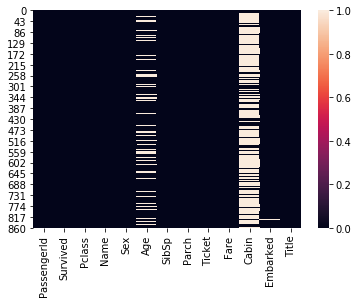

In [167]:
sn.heatmap(data.isnull())

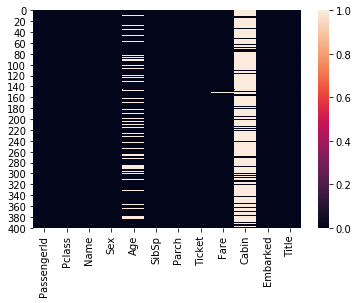

In [168]:
sn.heatmap(sub.isnull())

In [169]:
# Clubing the Sibling and Parch
for i in data:
    data['relatives'] = data['SibSp'] + data['Parch']   
    data.loc[data['relatives'] > 0, 'not_alone'] = 0
    data.loc[data['relatives'] == 0, 'not_alone'] = 1
    data['not_alone'] = data['not_alone'].astype(int)

In [170]:
for i in sub:
    sub['relatives'] = sub['SibSp'] + sub['Parch']   
    sub.loc[sub['relatives'] > 0, 'not_alone'] = 0
    sub.loc[sub['relatives'] == 0, 'not_alone'] = 1
    sub['not_alone'] = sub['not_alone'].astype(int)

In [171]:
data.drop(['SibSp','Parch'],axis=1,inplace =True)

In [172]:
sub.drop(['SibSp','Parch'],axis=1,inplace =True)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass','Sex','Age', 'relatives', 'not_alone', 'Fare', 'Title']], data['Survived'], test_size=0.25, stratify=data['Survived'],random_state=42)

In [175]:
X_train.head()

,Pclass,Sex,Age,relatives,not_alone,Fare,Title
486,1,0,35.0,1,0,90.000,Mrs
238,2,1,19.0,0,1,10.500,Mr
722,2,1,34.0,0,1,13.000,Mr
184,3,0,4.0,2,0,22.025,Miss
56,2,0,21.0,0,1,10.500,Miss


In [176]:
m = X_train['Age'].mean()

In [177]:
X_train['Age'].fillna(m, inplace=True)
sub['Age'].fillna(m, inplace=True)

In [178]:
X_test['Age'].fillna(m, inplace=True)

#### Encoding

In [180]:
from sklearn.preprocessing import OneHotEncoder
pencod = OneHotEncoder(sparse = False)
pt1 = pencod.fit_transform(X_train['Pclass'].values.reshape(-1,1))

In [181]:
ptt = pencod.fit_transform(X_test['Pclass'].values.reshape(-1,1))

In [182]:
pt2 = pencod.transform(sub['Pclass'].values.reshape(-1,1))

In [183]:
p1 = pd.DataFrame(pt1)

In [184]:
p2 = pd.DataFrame(ptt)

In [185]:
p3 = pd.DataFrame(pt2)

In [186]:
pa1 = pd.get_dummies(X_train['relatives'],prefix='relatives',drop_first=False)

In [187]:
pa2 = pd.get_dummies(X_test['relatives'],prefix='relatives',drop_first=False)

In [188]:
pa3 = pd.get_dummies(sub['relatives'],prefix='relatives',drop_first=False)

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
tags = vect.fit_transform(X_train['Title']).toarray()
t = vect.get_feature_names()

In [190]:
t = pd.DataFrame(tags, columns=t)

In [191]:
X_train.reset_index(drop=True, inplace=True)
t.reset_index(drop=True, inplace=True)
p1.reset_index(drop=True, inplace=True)
pa1.reset_index(drop=True, inplace=True)

In [192]:
X_tr = pd.concat([X_train,p1,t,pa1],axis=1)

In [193]:
te = vect.transform(X_test['Title']).toarray()
t2= vect.get_feature_names()

In [194]:
tes = pd.DataFrame(te, columns=t2)

In [195]:
X_test.reset_index(drop=True, inplace=True)
tes.reset_index(drop=True, inplace=True)
p2.reset_index(drop=True, inplace=True)
pa2.reset_index(drop=True, inplace=True)

In [196]:
X_tes = pd.concat([X_test,p2, tes,pa2],axis =1)

In [197]:
X_tr.drop(['Title','Pclass'],axis=1, inplace =True)

In [198]:
X_tes.drop(['Title','Pclass'],axis=1, inplace =True)

In [199]:
su = vect.transform(sub['Title']).toarray()
t3 = vect.get_feature_names()

In [200]:
ti = pd.DataFrame(su,columns=t3)

In [201]:
sub.reset_index(drop=True, inplace=True)
ti.reset_index(drop=True, inplace=True)
p3.reset_index(drop=True, inplace=True)
pa3.reset_index(drop=True, inplace=True)

In [202]:
test = pd.concat([sub,p3,ti,pa3],axis=1)

In [203]:
test.drop(['Title','Cabin','Name','PassengerId','Embarked','Pclass'],axis=1, inplace =True)

In [204]:
X_tr.shape

(668, 30)

In [205]:
fm = X_tr['Fare'].mean(axis =0)

In [206]:
test['Fare'].fillna(m,axis=0,inplace=True)

In [207]:
X_tes.shape

(223, 30)

#### Scaling

In [208]:
from sklearn.preprocessing import MinMaxScaler

In [209]:
ageScaler = MinMaxScaler()
X_tr['Age'] = ageScaler.fit_transform(X_tr['Age'].values.reshape(-1,1))
X_tes['Age'] = ageScaler.transform(X_tes['Age'].values.reshape(-1,1))

In [210]:
fareScaler =  MinMaxScaler()
X_tr['Fare'] = fareScaler.fit_transform(X_tr['Fare'].values.reshape(-1,1))
X_tes['Fare'] = fareScaler.transform(X_tes['Fare'].values.reshape(-1,1))

In [211]:
test['Age'] = ageScaler.transform(test['Age'].values.reshape(-1,1))

In [212]:
test['Fare'] = ageScaler.transform(test['Fare'].values.reshape(-1,1))

In [213]:
X_train = X_tr
X_test = X_tes
sub = test

In [214]:
X_train.drop(['relatives'],axis=1,inplace=True)

In [215]:
X_test.drop(['relatives'],axis=1,inplace=True)

In [216]:
sub.drop(['relatives'],axis=1,inplace=True)

#### Feature Importance

[0.16008684 0.22058711 0.01972061 0.23727997 0.04474337 0.0117454
 0.04821693 0.00101069 0.00188813 0.00177937 0.0012181  0.
 0.00170682 0.00508946 0.02136024 0.00120816 0.11890159 0.02179361
 0.00562317 0.00090966 0.00863703 0.01014112 0.01381575 0.00808575
 0.01438522 0.01206367 0.00426476 0.00125851 0.00247895]


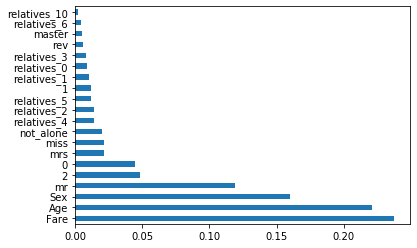

In [217]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [259]:
Xtrain = X_train[['Fare','Age','mr','Sex',2,0,'mrs','miss','master']]

In [260]:
Xtest = X_test[['Fare','Age','mr','Sex',2,0,'mrs','miss','master']]

In [261]:
sub = sub[['Fare','Age','mr','Sex',2,0,'mrs','miss','master']]

#### Model Training

##### XGBOOST

In [218]:
from xgboost import XGBClassifier
classifier =XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [219]:
y_pred = classifier.predict(X_test)

In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8116591928251121

In [221]:
sub.drop(['Ticket'],axis=1,inplace=True)

In [222]:
params = {'max_depth':[1,3,5,7,9], 'n_estimators':[10, 50, 100]}
model = GridSearchCV(XGBClassifier(n_jobs=-1), param_grid=params,scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, r

In [223]:
model.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [224]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [225]:
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

0.8952095808383234
0.8071748878923767


##### Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs =-1)

In [227]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
y_pred = classifier.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8116591928251121

##### Hyperparameter Tunning

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [231]:
[10**-x for x in range(-4,5,1)]

[10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [232]:
params = {'penalty':['l1','l2'],'C':[10**-x for x in range(-4,5,1)]}
model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid=params,cv=5, n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001,
                               0.0001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [233]:
X_test.shape

(223, 29)

In [234]:
X_train.shape

(668, 29)

In [235]:
model.best_params_

{'C': 1, 'penalty': 'l1'}

In [236]:
model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
train_pred = model.best_estimator_.predict(X_train)
test_pred = model.best_estimator_.predict(X_test)

In [238]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

0.8338323353293413
0.8161434977578476


In [239]:
 cv_r = model.cv_results_

In [240]:
model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
model.best_score_

0.8308383233532934

In [242]:
CV = pd.DataFrame(cv_r)

In [243]:
# Visualization
mean = CV['mean_test_score']

In [244]:
mt= CV['mean_train_score']

In [245]:
c = CV['param_C']

In [246]:
c2 = c[1::2]

In [247]:
test_l2 = mean[1::2]

In [248]:
test_l1 = mean[0::2]

In [249]:
c1 = c[0::2]

In [250]:
train_l2 = mt[1::2]

In [251]:
train_l1 = mt[0::2]

In [252]:
c = list(map(lambda x: np.log10(x),c2))
c1 = list(map(lambda x: np.log10(x),c1))

Text(0.5, 1.0, 'L2 Regularizer')

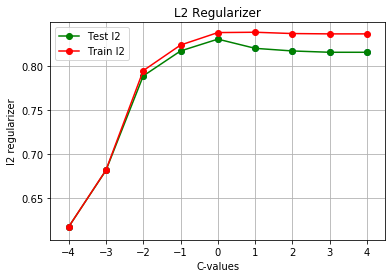

In [253]:
# plt.semilogx(c2,l2,'o-',color="g")
plt.plot(c,test_l2,'o-',color="g",label="Test l2")
plt.plot(c,train_l2,'o-',color="r", label="Train l2")
plt.scatter(c,test_l2)
plt.grid()
plt.legend()
plt.xlabel("C-values")
plt.ylabel("l2 regularizer")
plt.title("L2 Regularizer")

Text(0.5, 1.0, 'L1 Regularizer')

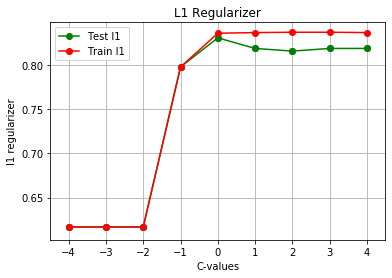

In [254]:
# plt.semilogx(c2,l2,'o-',color="g")
plt.plot(c1,test_l1,'o-',color="g",label="Test l1")
plt.plot(c1,train_l1,'o-',color="r", label="Train l1")
plt.scatter(c1,test_l1)
plt.grid()
plt.legend()
plt.xlabel("C-values")
plt.ylabel("l1 regularizer")
plt.title("L1 Regularizer")

In [255]:
sub_pred = classifier.predict(sub)

In [257]:
X_train.head()

,Sex,Age,not_alone,Fare,0,1,2,col,don,dr,...,sir,relatives_0,relatives_1,relatives_2,relatives_3,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10
0,0,0.434531,0,0.175668,1.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0.233476,1,0.020495,0.0,1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0.421965,1,0.025374,0.0,1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0.044986,0,0.042990,0.0,0.0,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.258608,1,0.020495,0.0,1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [262]:
pre = pd.DataFrame(sub_pred)

In [268]:
passid = pd.read_csv('test.csv')

In [271]:
p = passid['PassengerId']

In [279]:
submission = pd.concat([p,pre],axis=1)

In [283]:
submission.to_csv(r'/home/kuljeet/Desktop/prediction.csv',index=False)